In [2]:
import os, sys, glob, math, csv

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [85]:

##########################################################################
##          movie files and parameters
##########################################################################
DATAHOME = '/home/staff1/ctorney/data/wildebeest_front/'
inputname = DATAHOME + '/wildfront.csv'
dfMovies = pd.read_csv(inputname)


dfMovies = dfMovies[dfMovies['ir']==0]
beestList = np.zeros(shape=(0,3))
##########################################################################
##          loop through movies in list
##########################################################################
for index, d in dfMovies.iterrows():
    filename = DATAHOME + d['filename']
    direct, ext = os.path.split(filename)
    noext, _ = os.path.splitext(ext)
    outputBLfile = direct + '/proc/' +  noext + '_BL.npy'
    inputdatafile = direct + '/proc/' +  noext + '_POS.txt'
    warpsfile = direct + '/proc/' + noext + '_WARP.npy'
    warps = np.load(warpsfile)

    data = np.genfromtxt(inputdatafile,delimiter=',') #,dtype=None, names=True)

    timepoints=data[:,0]
    w_ids=(data[:,1])
    widths= data[:,4]-data[:,2]
    xpos = 0.5*(data[:,2]+data[:,4])
    ypos = 0.5*(data[:,3]+data[:,5])
    
    bodylengths = np.zeros(len(warps))
    for t in range(len(warps)):
        
        warp = warps[t]
        thisInds = timepoints==t
        if np.sum(thisInds)==0:
            continue
        thisID = w_ids[thisInds]
        thisXP = xpos[thisInds]
        thisYP = ypos[thisInds]
        thisWidth = widths[thisInds]
        #im_aligned = np.zeros_like(frame)
        #im_aligned = cv2.warpPerspective(frame, warp, (S[0],S[1]), dst=im_aligned, borderMode=cv2.BORDER_TRANSPARENT)
        iwarp = np.linalg.inv(warp)

        centre = np.vstack((thisXP[:].T,thisYP[:].T)).T
        centre = np.expand_dims(centre,axis=0)
        centre = cv2.perspectiveTransform(centre,iwarp)[0]
        lefts = np.vstack((centre[:,0]-0.5*thisWidth,centre[:,1].T)).T
        lefts = np.expand_dims(lefts,axis=0)
        lefts = cv2.perspectiveTransform(lefts,warp)[0]
        rights = np.vstack((centre[:,0]+0.5*thisWidth,centre[:,1].T)).T
        rights = np.expand_dims(rights,axis=0)
        rights = cv2.perspectiveTransform(rights,warp)[0]
        newWidths = rights[:,0]-lefts[:,0]
        bodylengths[t] = np.percentile(newWidths, 90)
#           cv2.circle(im_aligned, (int(centre[0]), int(centre[1])),5,(255,255,255), -1)
    np.save(outputBLfile,bodylengths)
    #break
# iwarp = np.linalg.inv(warp)
#                 bwidth = bbox[2]-bbox[0]
#                 bheight = bbox[3]-bbox[1]
#                 centre = np.expand_dims([0.5*(bbox[0]+bbox[2]),0.5*(bbox[1]+bbox[3])], axis=0)
#                 centre = np.expand_dims(centre,axis=0)
# centre = cv2.perspectiveTransform(centre,iwarp)[0,0,:]

#     for i in range(int(np.max(timepoints)//(4*60))):
#         indexes = (timepoints>(i*4*60))&(timepoints<((i+1)*4*60))
#         t_w_id = w_ids[indexes]
#         t_tp = timepoints[indexes]
#         for w in np.unique(t_w_id):
#             length = np.max(t_tp[t_w_id==w])-np.min(t_tp[t_w_id==w])
#             if length>(59*4):
#                 beestList=np.append(beestList,np.array([[index,i,w]]),axis=0)
#                 count+=1
        
    
#     print(count)

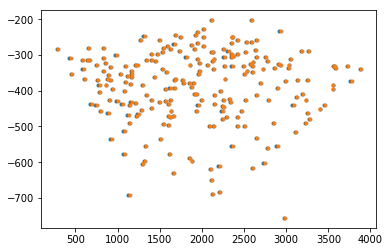

In [77]:
plt.plot(lefts[:,0],-centre[:,1],'.')
plt.plot(rights[:,0],-centre[:,1],'.')
plt.show()

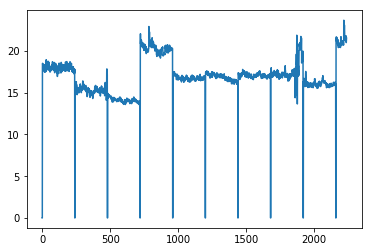

In [83]:
plt.plot(bodylengths )

18.056033587718048


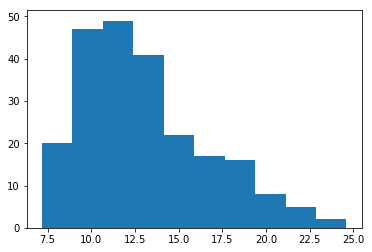

In [73]:
plt.hist(newWidths)
print(np.percentile(newWidths, 90))
plt.show()

In [80]:
bodylengths.shape


(2240,)

In [18]:
centre = np.expand_dims(centre,axis=0)

In [23]:
a = np.array([[1, 2], [4, 5], [7, 8]], dtype='float32')
h = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype='float32')
a = np.array([a])

pointsOut = cv2.perspectiveTransform(a, h)

In [50]:
centre.shape

(227, 2)